In [1]:
import nease
import pandas as pd
import csv
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

### VastDB prcessing

In [2]:
data_folder='/home/zakaria/projects/exon_enrch/data/'
events= pd.read_table(data_folder+"VASTDB_PSI_Hsa108_hg19.tab")
annot= pd.read_table(data_folder+"events_all.tab")

In [3]:
pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_colwidth', -1)


In [4]:
events.head(10)

,GENE,EVENT,COORD,LENGTH,FullCO,COMPLEX,Adipose_b,Adipose_b-Q,Adipose_c,Adipose_c-Q,Adipose_d,Adipose_d-Q,Adrenal_b,Adrenal_b-Q,Adrenal_c,Adrenal_c-Q,Amnion,Amnion-Q,Astrocytes,Astrocytes-Q,Bladder_a,Bladder_a-Q,Bone_marrow_a,Bone_marrow_a-Q,Bone_marrow_b,Bone_marrow_b-Q,Bone_marrow_c,Bone_marrow_c-Q,Brain_Endoth,Brain_Endoth-Q,Breast_Epith_a,Breast_Epith_a-Q,Breast_a,Breast_a-Q,CL_293T,CL_293T-Q,CL_Gm12878,CL_Gm12878-Q,CL_HeLa,CL_HeLa-Q,CL_K562,CL_K562-Q,CL_LP1,CL_LP1-Q,CL_MB231,CL_MB231-Q,CL_MCF7,CL_MCF7-Q,CL_PNT2,CL_PNT2-Q,Cerebellum_a,Cerebellum_a-Q,Cerebellum_c,Cerebellum_c-Q,Chorion,Chorion-Q,Colon_b,Colon_b-Q,Colon_sigmoid,Colon_sigmoid-Q,Colon_transverse,Colon_transverse-Q,Cortex,Cortex-Q,Decidua,Decidua-Q,ESC_H1_a,ESC_H1_a-Q,ESC_H1_b,ESC_H1_b-Q,ESC_H1_c,ESC_H1_c-Q,ESC_H1_d,ESC_H1_d-Q,ESC_H9_a,ESC_H9_a-Q,ESC_H9_b,ESC_H9_b-Q,Embr_Cortex_13_17wpc,Embr_Cortex_13_17wpc-Q,Embr_Forebrain_9_12wpc,Embr_Forebrain_9_12wpc-Q,Embr_Forebrain_St13_14,Embr_Forebrain_St13_14-Q,Embr_Forebrain_St17_20,Embr_Forebrain_St17_20-Q,Embr_Forebrain_St22_23,Embr_Forebrain_St22_23-Q,EndomStromCells,EndomStromCells-Q,EndothCells,EndothCells-Q,EpithelialCells,EpithelialCells-Q,Fibroblasts,Fibroblasts-Q,Frontal_Gyrus_old,Frontal_Gyrus_old-Q,Frontal_Gyrus_young,Frontal_Gyrus_young-Q,GLS_Cells,GLS_Cells-Q,HFDPC,HFDPC-Q,HMEpC_a,HMEpC_a-Q,Heart_a,Heart_a-Q,Heart_b,Heart_b-Q,Heart_c,Heart_c-Q,Kidney_b,Kidney_b-Q,Kidney_c,Kidney_c-Q,Kidney_d,Kidney_d-Q,Liver_a,Liver_a-Q,Liver_b,Liver_b-Q,Liver_c,Liver_c-Q,Lung_b,Lung_b-Q,Lung_e,Lung_e-Q,Lung_f,Lung_f-Q,Lymph_node_b,Lymph_node_b-Q,Lymph_node_c,Lymph_node_c-Q,MNC,MNC-Q,MSC,MSC-Q,Melanocytes,Melanocytes-Q,Microglia,Microglia-Q,Muscle_b,Muscle_b-Q,Muscle_d,Muscle_d-Q,Muscle_e,Muscle_e-Q,NPC_a,NPC_a-Q,NPC_b,NPC_b-Q,Neuroblastoma,Neuroblastoma-Q,Neurons,Neurons-Q,Oligodendrocytes,Oligodendrocytes-Q,Ovary_a,Ovary_a-Q,Ovary_b,Ovary_b-Q,Placenta_Epith,Placenta_Epith-Q,Placenta_a,Placenta_a-Q,Placenta_b,Placenta_b-Q,Placenta_c,Placenta_c-Q,Prostate_b,Prostate_b-Q,Prostate_c,Prostate_c-Q,Prostate_d,Prostate_d-Q,Retina_a,Retina_a-Q,Retina_macular,Retina_macular-Q,Retina_peripheral,Retina_peripheral-Q,Skin,Skin-Q,Small_intestine,Small_intestine-Q,Spleen_a,Spleen_a-Q,Spleen_b,Spleen_b-Q,Stomach_a,Stomach_a-Q,Stomach_b,Stomach_b-Q,Sup_Temporal_Gyrus,Sup_Temporal_Gyrus-Q,Testis_a,Testis_a-Q,Testis_b,Testis_b-Q,Testis_c,Testis_c-Q,Thymus_a,Thymus_a-Q,Thymus_b,Thymus_b-Q,Thyroid_b,Thyroid_b-Q,Thyroid_c,Thyroid_c-Q,Thyroid_d,Thyroid_d-Q,WBC_MNC_b,WBC_MNC_b-Q,WBC_MNC_c,WBC_MNC_c-Q,Whole_Brain_b,Whole_Brain_b-Q,iPS_a,iPS_a-Q,iPS_b,iPS_b-Q
0,A1CF,HsaALTA0000001-1/2,chr10:52573617-52573798,0,"chr10:52575766,52573617-52573822+52573798",Alt3,NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,1=1,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,1=1,S@0,0",80.00,"N,N,N,5=5,S@4.00,1.00",NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,5=5,S@5.00,0.00",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,7=7,S@7.00,0.00",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",0.00,"N,N,N,1=1,S@0,0",NaN,"N,N,N,0=0,S@0,0",65.09,"SOK,SOK,SOK,106=106,S@69.00,37.00",93.33,"VLOW,VLOW,VLOW,15=15,S@14.00,1.00",88.28,"SOK,SOK,SOK,145=145,S@128.01,16.99",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",0.00,"N,N,N,1=1,S@0,0",0.00,"N,N,N,1=1,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,2=2,S@2.00,0.00",NaN,"N,N,N,0=0,S@0,0",86.00,"OK,OK,OK,50=50,S@43.00,7.00",81.63,

In [5]:
# extract the events in the following tissues

tissues=['Heart_b','Kidney_c','Whole_Brain_b','ESC_H1_a','Testis_c','Liver_c','Colon_b','EpithelialCells','Bone_marrow_b'
        
        ,'Muscle_b','Muscle_e' ,'Lung_e' ,'Cortex','Cerebellum_a' ,'Heart_c' ,'Heart_a' ,'Neuroblastoma','Cerebellum_c' ]

heart=events[['EVENT']+tissues+[ t+'-Q' for t in tissues ]]



#tissue_of_interest='Heart_b'

In [6]:
# quality of dataset filter
psi=heart
for t in tissues:
    psi=psi[(heart[t+'-Q'].str.startswith('OK')) | (psi[t+'-Q'].str.startswith('SOK')) | (psi[t+'-Q'].str.startswith('L'))]
psi=psi[['EVENT']+tissues]
len(psi)

<ipython-input-6-65bc33054161>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  psi=psi[(heart[t+'-Q'].str.startswith('OK')) | (psi[t+'-Q'].str.startswith('SOK')) | (psi[t+'-Q'].str.startswith('L'))]


13967

/home/zakaria/anaconda3/envs/z1/lib/python3.9/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


(583, 13967)

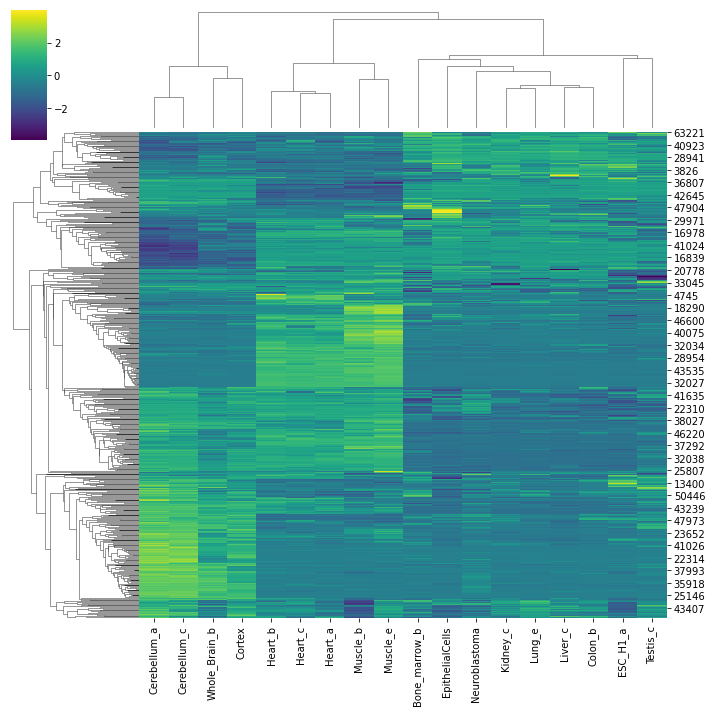

In [7]:
# visualization of the data
# for better visualization only events with some variance are shown psi['std']>20
psi['std']=psi[tissues].std(axis = 1, skipna = True) 
psi_var=psi[psi['std']>20]
g = sns.clustermap(psi_var[tissues],cmap="viridis",z_score=0)
len(psi_var),len(psi)

In [8]:
# variance filter
# keep only events wih psi['std']>10
psi_k=psi[psi['std']>10]

## clustering 

In [9]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(psi[tissues])
len(kmeans.labels_)
psi['clusters']=kmeans.labels_
cluster=psi.set_index('clusters')

In [10]:
cluster=cluster[cluster['std']>20]
cluster

,EVENT,Heart_b,Kidney_c,Whole_Brain_b,ESC_H1_a,Testis_c,Liver_c,Colon_b,EpithelialCells,Bone_marrow_b,Muscle_b,Muscle_e,Lung_e,Cortex,Cerebellum_a,Heart_c,Heart_a,Neuroblastoma,Cerebellum_c,std
clusters,,,,,,,,,,,,,,,,,,,,
7,HsaALTA0000074-1/2,12.22,92.80,65.00,85.00,56.06,80.77,89.57,82.82,63.33,52.53,37.88,46.49,53.33,8.33,87.30,25.49,72.73,30.00,26.811302
6,HsaALTA0000074-2/2,87.78,7.20,35.00,15.00,43.94,19.23,10.43,17.18,36.67,47.47,62.12,53.51,46.67,91.67,12.70,74.51,27.27,70.00,26.811302
4,HsaALTA0000591-1/2,6.89,0.00,72.70,4.38,3.11,5.56,1.45,0.00,6.88,10.34,8.98,2.03,58.94,76.59,18.50,4.70,15.29,77.09,28.457781
2,HsaALTA0000591-2/2,93.11,100.00,27.30,95.62,96.89,94.44,98.55,100.00,93.12,89.66,91.02,97.97,41.06,23.41,81.50,95.30,84.71,22.91,28.457781
0,HsaALTA0001438-1/2,18.62,34.57,5.25,0.00,82.30,10.74,14.24,4.08,5.01,69.15,66.73,38.49,14.09,5.01,9.27,7.45,6.11,7.49,25.495477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,HsaINT0171341,9.00,7.64,5.82,23.38,11.74,5.86,4.53,3.77,13.93,2.81,85.94,9.73,9.99,48.72,16.23,3.36,11.13,24.23,20.495206
6,HsaINT0171663,19.58,32.10,58.63,26.57,54.11,41.37,36.23,5.21,79.55,12.33,38.74,45.79,74.49,79.29,25.27,36.80,41.65,82.09,23.340694
6,HsaINT0175362,27.43,60.91,27.42,13.64,7.25,18.29,32.20,22.07,36.77,2.44,61.64,49.17,65.41,74.87,51.56,14.68,43.59,83.49,24.068155


/home/zakaria/anaconda3/envs/z1/lib/python3.9/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


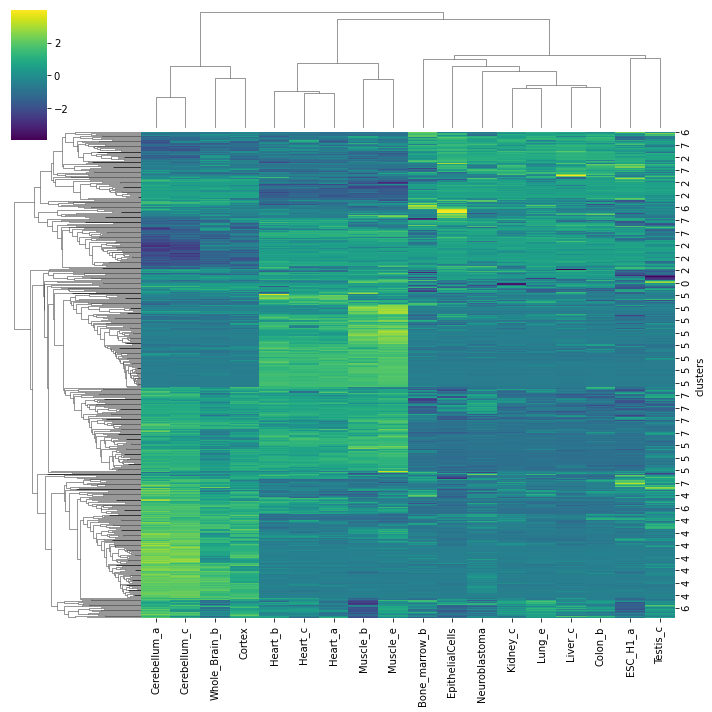

In [11]:
g = sns.clustermap(cluster[tissues],cmap="viridis",z_score=0)

In [12]:
# Extract heart and muscle specific exons
# cluster 5
heart_cluster=psi[psi['clusters']==5]

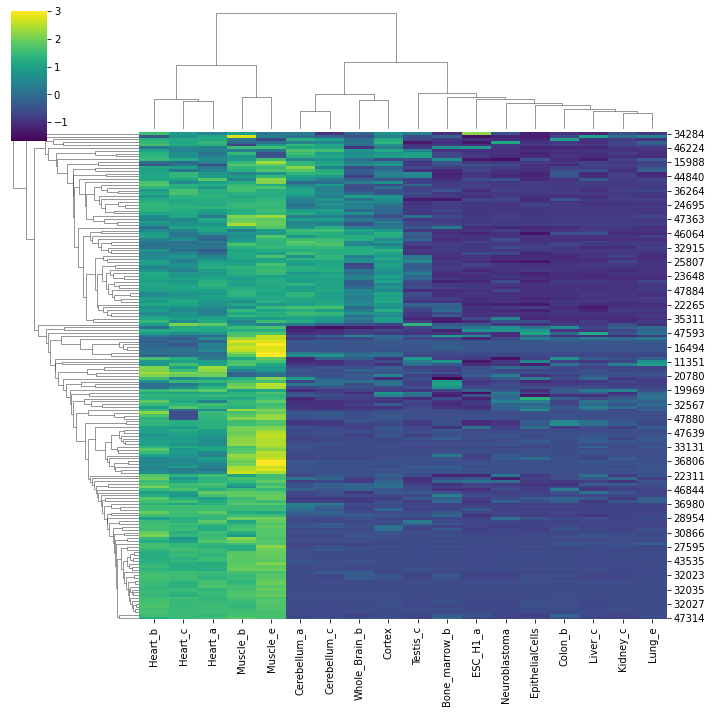

In [13]:
g = sns.clustermap(heart_cluster[tissues],cmap="viridis",z_score=0)

In [14]:
heart_cluster.head(5)

,EVENT,Heart_b,Kidney_c,Whole_Brain_b,ESC_H1_a,Testis_c,Liver_c,Colon_b,EpithelialCells,Bone_marrow_b,Muscle_b,Muscle_e,Lung_e,Cortex,Cerebellum_a,Heart_c,Heart_a,Neuroblastoma,Cerebellum_c,std,clusters
3825,HsaALTA0004964-1/2,82.58,25.18,44.83,9.96,31.19,11.46,17.27,31.92,62.51,65.79,85.28,36.13,28.87,56.38,75.26,61.11,5.30,63.25,25.654805,5
4740,HsaALTA0006143-2/2,21.86,4.53,26.56,1.66,14.58,4.47,0.76,0.15,25.10,44.95,52.24,2.36,24.41,33.48,39.36,40.19,0.83,43.57,18.048993,5
4745,HsaALTA0006148-1/2,82.70,5.64,10.34,10.22,4.09,4.72,8.52,18.59,4.27,52.00,48.77,3.79,17.46,8.19,52.04,88.70,22.21,12.81,27.392029,5
5334,HsaALTA0006899-1/2,85.05,26.16,30.66,12.62,11.57,25.41,8.08,6.30,7.80,68.37,81.60,17.42,36.28,23.12,80.64,83.72,10.81,27.59,29.561477,5
6295,HsaALTA0008096-2/2,54.38,15.65,0.00,5.41,17.30,29.55,11.36,6.17,12.75,80.49,76.92,6.47,18.18,7.89,55.22,80.49,4.76,11.46,28.349822,5


### Prepare the list of events in NEASE format

In [15]:
event_cord=pd.merge(annot,heart_cluster['EVENT'])    

In [16]:
event_cord['start']= event_cord['COORD_o'].apply(lambda x: x.split('-')[0].split(':')[1])
event_cord['end']= event_cord['COORD_o'].apply(lambda x: x.split('-')[1])
event_cord=event_cord[['GENE','start','end']]

In [17]:
# convert gene names to gene IDs using nease functions
convert_help=nease.functions.database_mapping['Human'][['Gene name','Gene stable ID']]
input=pd.merge(event_cord,convert_help,left_on='GENE',right_on='Gene name')
input=input[['Gene stable ID','start','end']].drop_duplicates()


In [18]:
input

,Gene stable ID,start,end
0,ENSG00000005893,120439076,120439293
12,ENSG00000007047,45298143,45298222
45,ENSG00000008294,50975863,50975901
79,ENSG00000009307,114741527,114741673
186,ENSG00000040341,73709032,73709162
...,...,...,...
11332,ENSG00000173511,64237521,64237655
11336,ENSG00000111667,6863186,6863377
11378,ENSG00000130227,21971876,21971968
11387,ENSG00000138674,82842185,82842481


## NEASE analysis


In [19]:
# Run nease with standard input.
events=nease.run(input, organism='Human')

Delta PSI column was not found. Proceeding with all events (no filtering)

		Data Summary
**************************************************
30 protein domains are affected by AS.
13 of the affected domains have known interactions.
121 protein interactions/binding affected.

**************************************************
Running enrichment analysis...
NEASE enrichment done.


In [20]:
# Run on KEGG gene set
events.classic_enrich(gseapy_databases=['Reactome_2016']).head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Reactome_2016,Smooth Muscle Contraction Homo sapiens R-HSA-445355,6/33,4.855541e-08,0.000018,0,0,37.380414,629.507116,TPM2;PXN;TPM1;SORBS1;TLN1;VCL
1,Reactome_2016,Membrane Trafficking Homo sapiens R-HSA-199991,13/420,2.134445e-06,0.000407,0,0,5.602342,73.151480,YWHAE;EXOC7;DCTN1;CLTC;USO1;AP1B1;MIA3;ANK3;TBC1D1;TBC1D4;AP1S2;TMED2;SEC31A
2,Reactome_2016,Vesicle-mediated transport Homo sapiens R-HSA-5653656,13/492,1.179947e-05,0.001499,0,0,4.742632,53.816809,YWHAE;EXOC7;DCTN1;CLTC;USO1;AP1B1;MIA3;ANK3;TBC1D1;TBC1D4;AP1S2;TMED2;SEC31A
3,Reactome_2016,Developmental Biology Homo sapiens R-HSA-1266738,16/786,2.874645e-05,0.001954,0,0,3.675998,38.439899,MEF2A;SPAG9;ROCK2;CLTC;ANK3;PTK2;NCOR2;ABLIM1;DLG1;NF1;TLN1;MARK3;MEF2D;CLASP1;VCL;CLASP2
4,Reactome_2016,RHO GTPase Effectors Homo sapiens R-HSA-195258,9/255,3.065648e-05,0.001954,0,0,6.244963,64.901816,YWHAE;CLIP1;PPP1R12A;ROCK2;ABI1;CLASP1;PTK2;CLASP2;NDEL1
5,Reactome_2016,Muscle contraction Homo sapiens R-HSA-397014,8/196,3.076443e-05,0.001954,0,0,7.222304,75.033608,TPM2;TPM1;PXN;ATP2B4;SORBS1;ATP2B1;TLN1;VCL
6,Reactome_2016,Axon guidance Homo sapiens R-HSA-422475,12/515,8.725295e-05,0.004749,0,0,4.126598,38.570066,ABLIM1;DLG1;ROCK2;CLTC;NF1;ANK3;TLN1;MARK3;CLASP1;PTK2;VCL;CLASP2
7,Reactome_2016,Signalling by NGF Homo sapiens R-HSA-166520,11/450,1.143577e-04,0.005446,0,0,4.310017,39.118485,YWHAE;MEF2A;KIDINS220;NF1;RAPGEF1;TLN1;MARK3;PTK2;VCL;TNRC6A;RTN4
11,Reactome_2016,Asparagine N-linked glycosylation Homo sapiens R-HSA-446203,8/259,2.143986e-04,0.006807,0,0,5.392224,45.551750,RPN2;DCTN1;GFPT1;USO1;TMED2;MIA3;ANK3;SEC31A
10,Reactome_2016,Signaling by VEGF Homo sapiens R-HSA-194138,9/328,2.092106e-04,0.006807,0,0,4.797956,40.649091,ROCK2;ABI1;PXN;VEGFB;NF1;TLN1;MARK3;PTK2;VCL


In [21]:
# Get list of all protein domais affected by AS.
# A link to DIGGER database for lost/gained domain and their binding.

events.get_domains().head(10)

,Gene name,NCBI gene ID,Gene stable ID,Exon stable ID,Pfam ID,dPSI,Interacting domain,Visualization link
0,STAU2,27067,ENSG00000040341,ENSE00003592065,PF00035,-,True,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00003592065
1,ATP2B4,493,ENSG00000058668,ENSE00001412059,PF12424,-,False,
2,ATP2B1,490,ENSG00000070961,ENSE00000909420,PF12424,-,True,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00000909420
3,SLC25A3,5250,ENSG00000075415,ENSE00000753647,PF00153,-,True,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00000753647
4,DLG1,1739,ENSG00000075711,ENSE00001080221,PF10608,-,False,
5,TMED2,10959,ENSG00000086598,ENSE00002313457,PF01105,-,True,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00002313457
6,TNRC6A,27327,ENSG00000090905,ENSE00003497843,PF10427,-,False,
7,LRRFIP2,9209,ENSG00000093167,ENSE00000825530,PF09738,-,False,
8,THOC5,8563,ENSG00000100296,ENSE00001646039,PF09766,-,False,
9,MTMR3,8897,ENSG00000100330,ENSE00001226215,PF01363,-,True,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00001226215


In [22]:
# Run nease enrichment on affected edges

events.enrich(database=['Reactome']).head(15)

NEASE enrichment for the pathway databases:
 ['Reactome']
Found 7 enriched pathways after multiple testing correction.



,Pathway ID,Pathway name,Source,Spliced genes (number of interactions affecting the pathway),p_value,adj p_value
0,R-HSA-390522,Striated Muscle Contraction,Reactome,"TPM1 (9), TPM2 (8)",4.516063e-25,8.192139e-22
1,R-HSA-397014,Muscle contraction,Reactome,"ATP2B1 (1), TPM1 (10), DST (1), TPM2 (8)",4.887702e-18,4.433145e-15
2,R-HSA-445355,Smooth Muscle Contraction,Reactome,"ATP2B1 (1), TPM1 (5), DST (1), TPM2 (4)",6.368262e-12,3.850676e-09
3,R-HSA-6807878,COPI-mediated anterograde transport,Reactome,"TMED2 (4), USO1 (1), PLEC (2)",8.200112e-05,2.592423e-02
4,R-HSA-199977,ER to Golgi Anterograde Transport,Reactome,"TMED2 (4), MTMR3 (1), USO1 (1), PLEC (2)",9.020247e-05,2.592423e-02
5,R-HSA-948021,Transport to the Golgi and subsequent modification,Reactome,"TMED2 (4), MTMR3 (1), USO1 (1), PLEC (2)",9.757002e-05,2.592423e-02
6,R-HSA-8873719,RAB geranylgeranylation,Reactome,VDAC3 (7),1.000384e-04,2.592423e-02
7,R-HSA-446203,Asparagine N-linked glycosylation,Reactome,"TMED2 (4), MTMR3 (1), USO1 (1), PLEC (2), USP5 (2)",2.303228e-04,5.222569e-02
8,R-HSA-451326,Activation of kainate receptors upon glutamate binding,Reactome,"ATP2B1 (1), DST (1), VDAC3 (3)",3.602253e-04,7.260540e-02
9,R-HSA-5627123,RHO GTPases activate PAKs,Reactome,"ATP2B1 (1), TPM1 (1), DST (1), PLEC (1), TPM2 (1), VDAC3 (1)",4.224359e-04,7.662987e-02


### Pathway specific analysis

In [23]:
events.path_analysis('R-HSA-445355')

Enrichment of the pathway: Smooth Muscle Contraction.

Overall p_value:  6.368262257080424e-12




,Spliced genes,NCBI gene ID,Gene knwon to be in the pathway,Percentage of edges associated to the pathway,p_value,Affected binding (edges),Affected binding (NCBI)
0,TPM1,7168,True,5/18,1.135313e-08,"ACTA2,TPM4,TPM1,TPM2,TPM3","59,7171,7168,7169,7170"
1,TPM2,7169,True,4/13,2.273525e-07,"TPM4,TPM1,TPM2,TPM3","7171,7168,7169,7170"
2,ATP2B1,490,False,1/1,4.269350e-03,CALM1,801
3,DST,667,False,1/1,4.269350e-03,CALM1,801


In [24]:
events.Vis_path('R-HSA-445355',file='AS data/enrichment/',k=0.8)

Enrichment of the pathway: Smooth Muscle Contraction.

Overall p_value:  6.368262257080424e-12


Visualization of the pathway generated in: AS data/enrichment/Smooth Muscle Contraction.html


In [25]:
events.Vis_path('R-HSA-390522',file='AS data/enrichment/',k=0.8)

Enrichment of the pathway: Striated Muscle Contraction.

Overall p_value:  4.516063248755784e-25


Visualization of the pathway generated in: AS data/enrichment/Striated Muscle Contraction.html
